# Classification Exercise

We'll be working with some California Census Data, we'll be trying to use various features of an individual to predict what class of income they belogn in (>50k or <=50k). 

Here is some information about the data:

<table>
<thead>
<tr>
<th>Column Name</th>
<th>Type</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>age</td>
<td>Continuous</td>
<td>The age of the individual</td>
</tr>
<tr>
<td>workclass</td>
<td>Categorical</td>
<td>The type of employer the  individual has (government,  military, private, etc.).</td>
</tr>
<tr>
<td>fnlwgt</td>
<td>Continuous</td>
<td>The number of people the census  takers believe that observation  represents (sample weight). This  variable will not be used.</td>
</tr>
<tr>
<td>education</td>
<td>Categorical</td>
<td>The highest level of education  achieved for that individual.</td>
</tr>
<tr>
<td>education_num</td>
<td>Continuous</td>
<td>The highest level of education in  numerical form.</td>
</tr>
<tr>
<td>marital_status</td>
<td>Categorical</td>
<td>Marital status of the individual.</td>
</tr>
<tr>
<td>occupation</td>
<td>Categorical</td>
<td>The occupation of the individual.</td>
</tr>
<tr>
<td>relationship</td>
<td>Categorical</td>
<td>Wife, Own-child, Husband,  Not-in-family, Other-relative,  Unmarried.</td>
</tr>
<tr>
<td>race</td>
<td>Categorical</td>
<td>White, Asian-Pac-Islander,  Amer-Indian-Eskimo, Other, Black.</td>
</tr>
<tr>
<td>gender</td>
<td>Categorical</td>
<td>Female, Male.</td>
</tr>
<tr>
<td>capital_gain</td>
<td>Continuous</td>
<td>Capital gains recorded.</td>
</tr>
<tr>
<td>capital_loss</td>
<td>Continuous</td>
<td>Capital Losses recorded.</td>
</tr>
<tr>
<td>hours_per_week</td>
<td>Continuous</td>
<td>Hours worked per week.</td>
</tr>
<tr>
<td>native_country</td>
<td>Categorical</td>
<td>Country of origin of the  individual.</td>
</tr>
<tr>
<td>income</td>
<td>Categorical</td>
<td>"&gt;50K" or "&lt;=50K", meaning  whether the person makes more  than \$50,000 annually.</td>
</tr>
</tbody>
</table>

## 1. Loading the libraries and dataset

### THE LIBRARIES

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import time

### THE DATA

In [5]:
data = pd.read_csv('census_data.csv')

## 2. Getting to know the data

See other notebook

## 3. Prepping the data

### LABEL PREP

In [7]:
data['label'] = data['income_bracket'].apply(lambda x: 1 if x ==' >50K' else 0)

In [9]:
y_val = data['label']

### FEATURE COLUMN IDENTIFICATION

In [49]:
data.dtypes

age                int64
workclass         object
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
gender            object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income_bracket    object
label              int64
dtype: object

In [52]:
num_cols = data.select_dtypes('int64').columns
cat_cols = data.select_dtypes('object').columns

In [53]:
cat_cols_list = list(cat_cols)
cat_cols_list.remove('income_bracket')
cat_cols_list

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native_country']

In [54]:
num_cols_list = list(num_cols)
num_cols_list.remove('label')
num_cols_list

['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

### FEATURE ENGINEERING PRE-SPLIT

In [12]:
data_dummies = data
data_dummies = data_dummies.drop('income_bracket', axis=1)
data_dummies = data_dummies.drop('label', axis=1)

x_data = pd.get_dummies(data_dummies)

In [13]:
data_dummies.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


### TRAINING TEST SPLIT

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x_data,
                                                    y_val,
                                                    test_size=0.3, 
                                                    random_state=101)

## 4. Building the model

In [15]:
sk_LogisticRegression_model = LogisticRegression()

In [18]:
start = time.time()
sk_LogisticRegression_model.fit(X_train, y_train)
end = time.time()
duration = end - start

In [19]:
duration

0.3476741313934326

## 5. Evaluating the model

### EVALUATING TRAINING

** Evaluate **

In [23]:
sk_LogisticRegression_model.score(X_train, y_train)

0.85152685152685148

** Predict **

In [24]:
training_predictions = sk_LogisticRegression_model.predict(X_train)

** Report **

In [26]:
print(classification_report(y_train, training_predictions))

             precision    recall  f1-score   support

          0       0.88      0.93      0.90     17284
          1       0.74      0.60      0.66      5508

avg / total       0.85      0.85      0.85     22792



In [27]:
print(confusion_matrix(y_train, training_predictions))

[[16101  1183]
 [ 2201  3307]]


** Error **

In [55]:
num_cols_x = [nc+ '_x' for nc in num_cols_list]
cols = cat_cols_list + num_cols_x

In [60]:
X_train_eval = data.merge(X_train, how='inner', left_on=data.index, right_on=X_train.index)[cols]
X_train_eval = X_train_eval.assign(label=y_train.values)
X_train_eval = X_train_eval.assign(prediction=pd.Series(training_predictions).values)
X_train_eval[((X_train_eval['label'] == 0) & (X_train_eval['prediction'] == 1) |
             ((X_train_eval['label'] == 1) & (X_train_eval['prediction'] == 0)))]

,workclass,education,marital_status,occupation,relationship,race,gender,native_country,age_x,education_num_x,capital_gain_x,capital_loss_x,hours_per_week_x,label,prediction
22,Private,11th,Never-married,Machine-op-inspct,Unmarried,White,Male,Puerto-Rico,48,7,0,0,40,1,0
47,Private,Assoc-acdm,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States,40,12,0,0,40,1,0
50,Private,Bachelors,Married-civ-spouse,Other-service,Husband,White,Male,Cuba,52,13,0,0,40,1,0
64,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,United-States,29,9,0,0,40,1,0
69,Private,HS-grad,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,United-States,42,9,0,0,40,1,0
86,Private,Bachelors,Married-civ-spouse,Sales,Husband,White,Male,United-States,37,13,0,0,50,1,0
88,Federal-gov,Masters,Married-civ-spouse,Prof-specialty,Husband,White,Male,Iran,38,14,0,0,40,0,1
90,Private,Assoc-voc,Married-civ-spouse,Adm-clerical,Wife,White,Female,United-States,27,11,0,0,35,0,1
91,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,United-States,49,10,0,0,40,1,0
93,Private,Some-college,Never-married,Sales,Own-child,White,Female,United-States,27,10,0,0,40,1,0


### EVALUATING TEST

** Evaluate **

In [62]:
sk_LogisticRegression_model.score(X_test, y_test)

0.85433514177500258

** Predict **

In [63]:
test_predictions = sk_LogisticRegression_model.predict(X_test)

** Report **

In [64]:
print(classification_report(y_test, test_predictions))

             precision    recall  f1-score   support

          0       0.88      0.93      0.91      7436
          1       0.74      0.61      0.67      2333

avg / total       0.85      0.85      0.85      9769



In [65]:
print(confusion_matrix(y_test, test_predictions))

[[6927  509]
 [ 914 1419]]


** Error **

In [66]:
X_test_eval = data.merge(X_test, how='inner', left_on=data.index, right_on=X_test.index)[cols]
X_test_eval = X_test_eval.assign(label=y_test.values)
X_test_eval = X_test_eval.assign(prediction=pd.Series(test_predictions).values)
X_test_eval[((X_test_eval['label'] == 0) & (X_test_eval['prediction'] == 1) |
            ((X_test_eval['label'] == 1) & (X_test_eval['prediction'] == 0)))]

,workclass,education,marital_status,occupation,relationship,race,gender,native_country,age_x,education_num_x,capital_gain_x,capital_loss_x,hours_per_week_x,label,prediction
11,Private,Some-college,Never-married,Sales,Own-child,Black,Male,United-States,20,10,0,0,44,0,1
13,Private,Some-college,Never-married,Machine-op-inspct,Own-child,White,Male,United-States,21,10,0,0,40,0,1
26,Self-emp-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,49,10,0,0,50,1,0
33,Private,9th,Never-married,Sales,Not-in-family,White,Male,United-States,30,5,0,0,40,0,1
38,Self-emp-not-inc,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,47,14,0,0,50,1,0
49,Private,Some-college,Married-civ-spouse,Other-service,Husband,White,Male,United-States,22,10,0,0,24,0,1
50,Private,11th,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,64,7,0,2179,40,1,0
51,Local-gov,Some-college,Divorced,Adm-clerical,Unmarried,White,Female,Mexico,47,10,0,0,38,1,0
56,?,1st-4th,Divorced,?,Not-in-family,White,Female,United-States,68,2,0,0,20,1,0
67,Private,5th-6th,Married-civ-spouse,Transport-moving,Other-relative,White,Male,Mexico,23,3,0,0,40,0,1


## 6. Visualizing feature weights

In [68]:
sk_LogisticRegression_model.intercept_

array([-2.74879568])

In [69]:
feature_importance_dict = {}
feature_importance_dict['features'] = x_data.columns
feature_importance_dict['weights'] = sk_LogisticRegression_model.coef_[0]

In [78]:
feature_importance = pd.DataFrame(feature_importance_dict)
feature_importance.sort_values("weights",ascending=False)

,features,weights
57,relationship_ Wife,1.051635
24,education_ Doctorate,0.776462
28,education_ Prof-school,0.661443
32,marital_status_ Married-civ-spouse,0.633786
41,occupation_ Exec-managerial,0.590772
50,occupation_ Tech-support,0.565852
48,occupation_ Protective-serv,0.325567
47,occupation_ Prof-specialty,0.310828
26,education_ Masters,0.298634
6,workclass_ Federal-gov,0.273606


In [79]:
cat_feature_importance = feature_importance[~feature_importance['features'].isin(num_cols_list)]

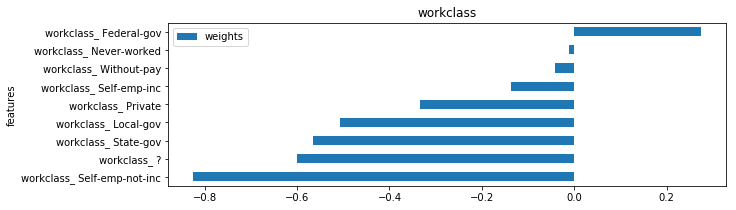

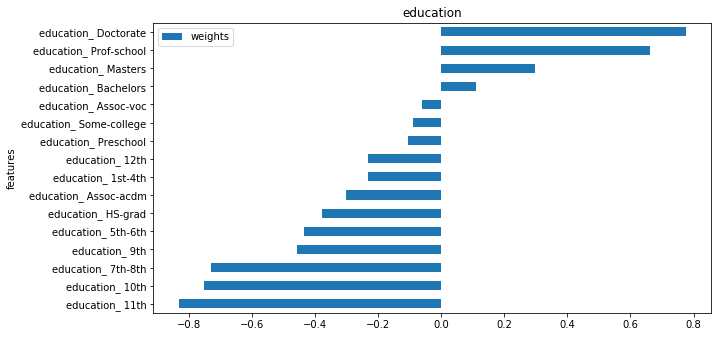

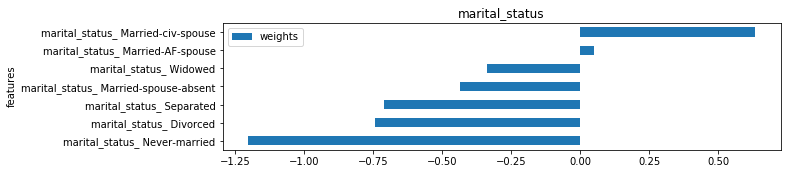

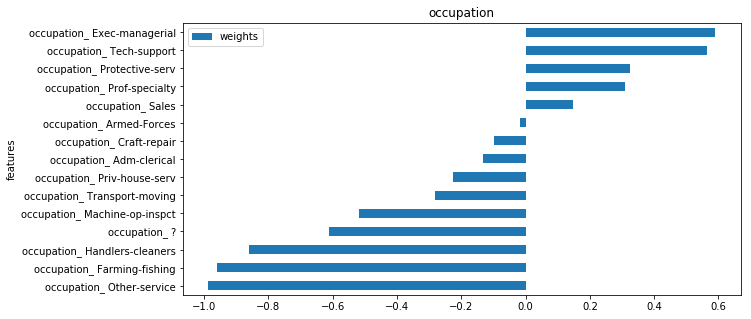

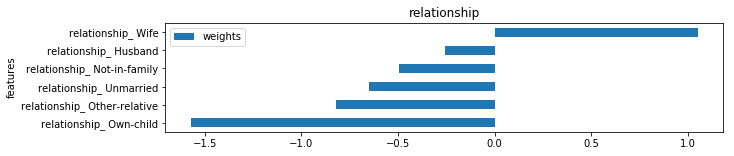

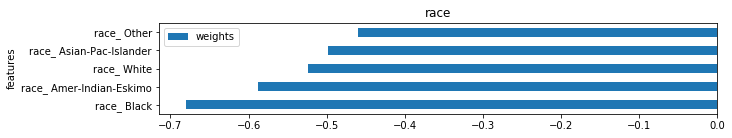

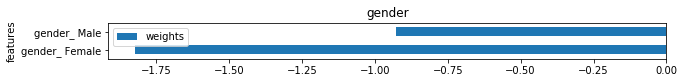

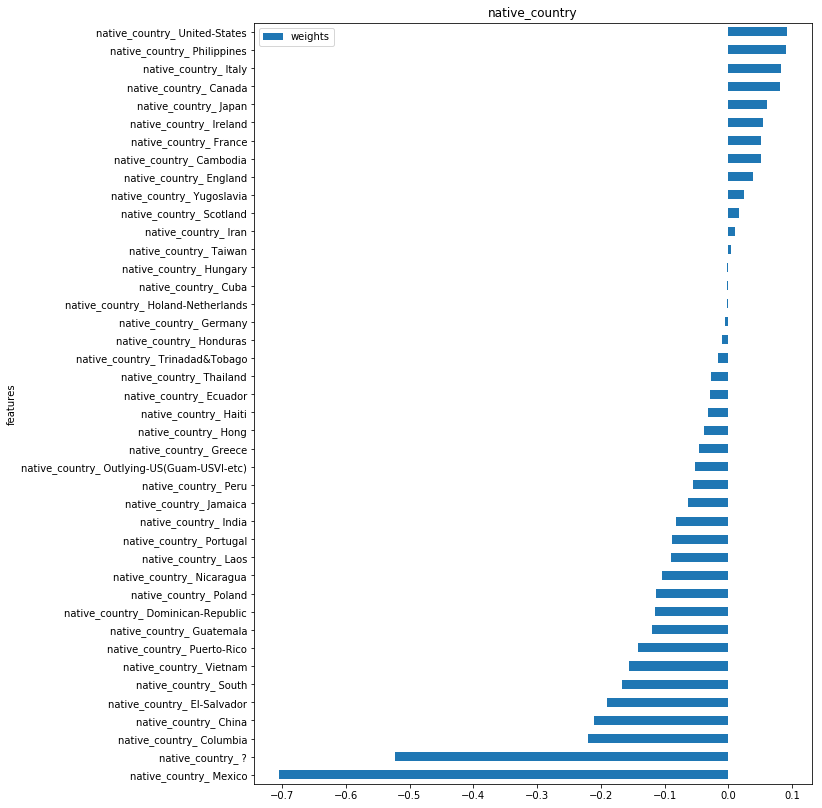

In [88]:
for cat_feat in cat_cols_list:  
    df = cat_feature_importance[cat_feature_importance['features'].str.startswith(cat_feat)]
    df = df.set_index('features')
    height = len(df)/3.
    df.sort_values("weights",ascending=True).plot(kind="barh", title=cat_feat, figsize=(10,height)) 

In [97]:
num_feature_importance = feature_importance[feature_importance['features'].isin(num_cols_list)].sort_values("weights",ascending=False)

In [98]:
num_feature_importance

,features,weights
1,education_num,0.153963
4,hours_per_week,0.027313
0,age,0.023151
3,capital_loss,0.000640
2,capital_gain,0.000301


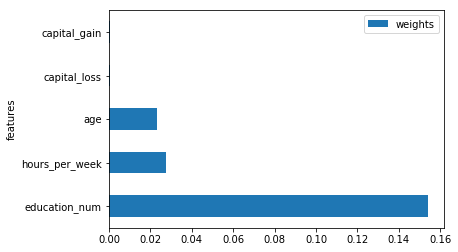

In [101]:
num_feature_importance.plot(kind='barh', x='features')